In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

In [2]:
df = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


df.to_excel('part2_data.xlsx')

In [4]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
df.columns.values

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

In [6]:
df.drop(columns=['Type', 'Coverage', 'REG', 'DEV', 'AREA'],inplace=True)

In [7]:
df.columns.values

array(['OdName', 'AreaName', 'RegName', 'DevName', 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013], dtype=object)

In [8]:
df.rename(columns={'OdName': 'Country', 'AreaName' : 'Continent', 'RegName': 'Region'}, inplace=True)

In [9]:
df.columns.values

array(['Country', 'Continent', 'Region', 'DevName', 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013], dtype=object)

In [10]:
df.columns = list(map(str, df.columns.values))

In [11]:
df.columns.values

array(['Country', 'Continent', 'Region', 'DevName', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013'],
      dtype=object)

In [12]:
df['Total'] = df.sum(axis=1)

In [13]:
df.columns.values

array(['Country', 'Continent', 'Region', 'DevName', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       'Total'], dtype=object)

In [14]:
df.set_index('Country', inplace=True)

In [15]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [16]:
years = list(map(str,range(1980,2014)))

In [17]:
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [18]:
piedata = df.groupby('Continent')

In [19]:
piedata = piedata.sum()['Total']

In [20]:
piedata

Continent
Africa                              618948
Asia                               3317794
Europe                             1410947
Latin America and the Caribbean     765148
Northern America                    241142
Oceania                              55174
Name: Total, dtype: int64

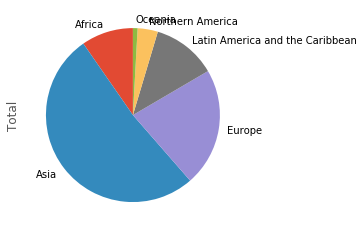

In [21]:
piedata.plot(kind='pie', startangle=90)

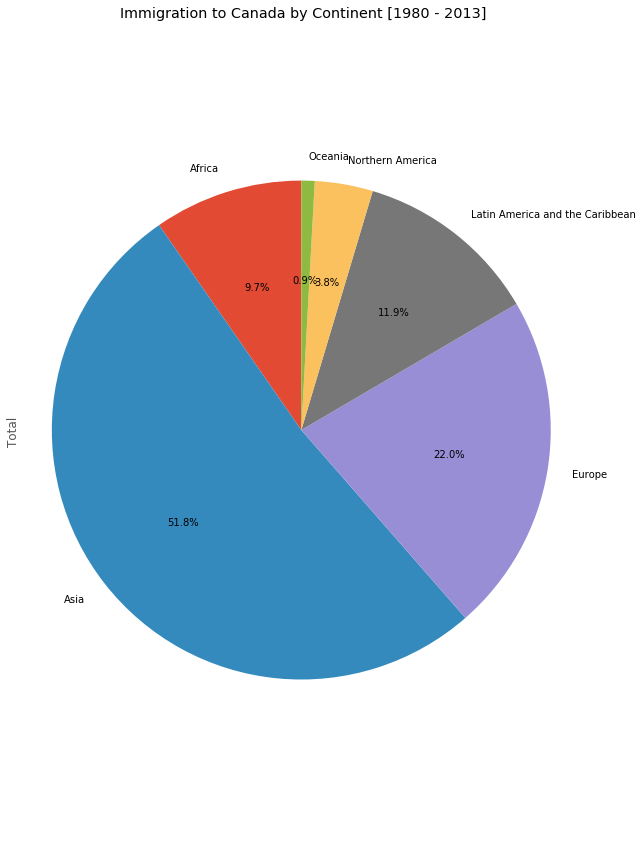

In [24]:
piedata.plot(kind='pie'
             , autopct='%1.1f%%' # add in percentages s
             ,startangle=90
             ,figsize=(10,15)
            )
plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

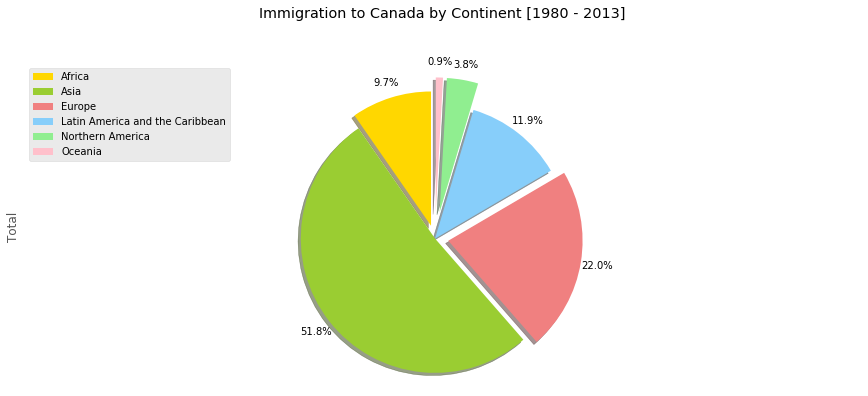

In [32]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1 ,0 ,0.1 ,0.0 ,0.2 ,0.2]
piedata.plot(kind='pie',
             figsize=(15,6),
             autopct='%1.1f%%',
             startangle=90,
             shadow=True,
             labels=None,
             pctdistance=1.12,
             colors=colors_list,
             explode=explode_list
            )

plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12)

plt.axis('equal')  


plt.legend(labels=piedata.index, loc='upper left')

plt.show()

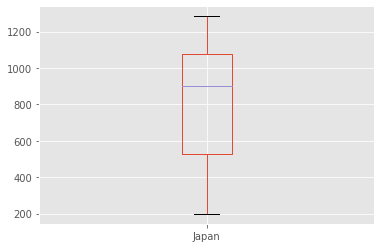

In [38]:
fromJapan = df.loc[['Japan'], years].T
fromJapan.plot(kind='box')

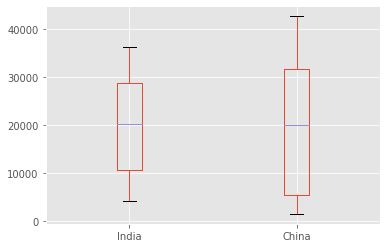

In [44]:
Compare = df.loc[['India', 'China'], years].T
Compare.plot(kind='box')

In [73]:
Compare_desc = Compare.describe()
Compare_desc['India']

count       34.000000
mean     20350.117647
std      10007.342579
min       4211.000000
25%      10637.750000
50%      20235.000000
75%      28699.500000
max      36210.000000
Name: India, dtype: float64

Text(41084.0, 2.105, 'Maximum')

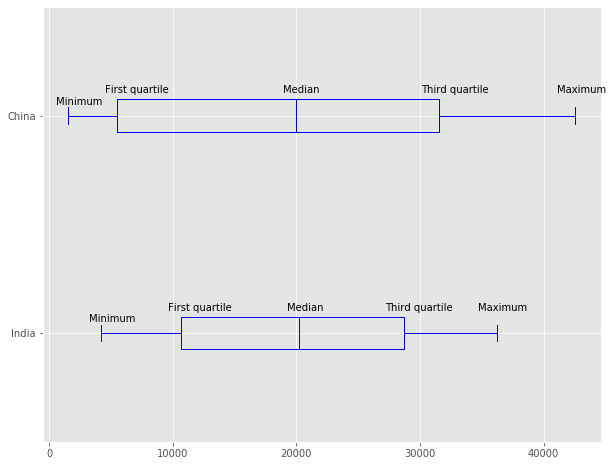

In [93]:
Compare.plot(kind='box', 
             figsize=(10,8),
             vert=False,
             color='blue'
            )

plt.text(Compare_desc['India']['50%']-1000, 1.105, 'Median', rotation=0)
plt.text(Compare_desc['India']['min']-1000, 1.05, 'Minimum', rotation=0)
plt.text(Compare_desc['India']['25%']-1000, 1.105, 'First quartile', rotation=0)
plt.text(Compare_desc['India']['75%']-1500, 1.105, 'Third quartile', rotation=0)
plt.text(Compare_desc['India']['max']-1500, 1.105, 'Maximum', rotation=0)



plt.text(Compare_desc['China']['50%']-1000, 2.105, 'Median', rotation=0)
plt.text(Compare_desc['China']['min']-1000, 2.05, 'Minimum', rotation=0)
plt.text(Compare_desc['China']['25%']-1000, 2.105, 'First quartile', rotation=0)
plt.text(Compare_desc['China']['75%']-1500, 2.105, 'Third quartile', rotation=0)
plt.text(Compare_desc['China']['max']-1500, 2.105, 'Maximum', rotation=0)